In [2]:
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
word_index = imdb.get_word_index()

In [5]:
reversed_word_index = dict([(v,k)for (k,v) in word_index.items()])
print ' '.join([reversed_word_index.get(i - 3, '?') for i in train_data[0]])

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [6]:
import numpy as np
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,seqence in enumerate(sequences):
        results[i, seqence] = 1.
    return results
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [7]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 17s 1ms/step - loss: 0.5084 - acc: 0.7814 - val_loss: 0.3794 - val_acc: 0.8687
Epoch 2/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3002 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.2179 - acc: 0.9289 - val_loss: 0.3085 - val_acc: 0.8712
Epoch 4/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1751 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8833
Epoch 5/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8870
Epoch 6/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3154 - val_acc: 0.8771
Epoch 7/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.0980 - acc: 0.9707 - val_loss: 0.3127 - v

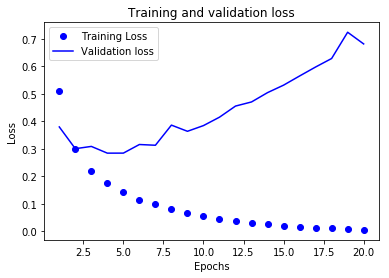

In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss_value, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_value, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

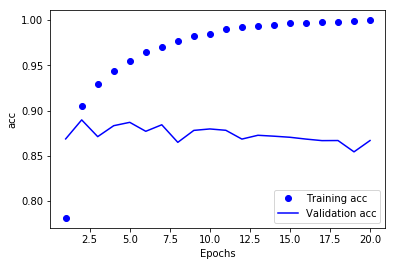

In [14]:
plt.clf()
val_acc_value = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_value, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 9s 359us/step - loss: 0.4753 - acc: 0.8205
Epoch 2/4
25000/25000 [==============================] - 3s 103us/step - loss: 0.2642 - acc: 0.9106
Epoch 3/4
25000/25000 [==============================] - 3s 103us/step - loss: 0.1994 - acc: 0.9301
Epoch 4/4
25000/25000 [==============================] - 3s 107us/step


In [16]:
results

[0.32690021797180174, 0.87172000000000005]

In [17]:
model.predict(x_test)

array([[ 0.12996227],
       [ 0.99971801],
       [ 0.25515902],
       ..., 
       [ 0.07296357],
       [ 0.04751595],
       [ 0.47531003]], dtype=float32)

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 209us/step - loss: 0.4566 - acc: 0.8122
Epoch 2/4
25000/25000 [==============================] - 3s 111us/step - loss: 0.2545 - acc: 0.9099
Epoch 3/4
25000/25000 [==============================] - 3s 111us/step - loss: 0.1948 - acc: 0.9304
Epoch 4/4
25000/25000 [==============================] - 8s 309us/step


In [19]:
results

[0.30102415836334229, 0.88315999999999995]

In [20]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
 1024/25000 [>.............................] - ETA: 11:59 - loss: 0.6881 - acc: 0.5371

/usr/local/lib/python2.7/dist-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.630028). Check your callbacks.
  % delta_t_median)


25000/25000 [==============================] - 203s 8ms/step - loss: 0.4401 - acc: 0.8152
Epoch 2/4
25000/25000 [==============================] - 3s 128us/step - loss: 0.2413 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 3s 127us/step - loss: 0.1864 - acc: 0.9309
Epoch 4/4
25000/25000 [==============================] - 39s 2ms/step


In [21]:
results

[0.36163157826423648, 0.86728000000000005]

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
history = model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/6
25000/25000 [==============================] - 37s 1ms/step - loss: 0.4379 - acc: 0.7915
Epoch 2/6
25000/25000 [==============================] - 4s 173us/step - loss: 0.2436 - acc: 0.9043
Epoch 3/6
25000/25000 [==============================] - 4s 168us/step - loss: 0.1872 - acc: 0.9282
Epoch 4/6
25000/25000 [==============================] - 4s 168us/step - loss: 0.1465 - acc: 0.9451
Epoch 5/6
25000/25000 [==============================] - 4s 168us/step - loss: 0.1065 - acc: 0.9616
Epoch 6/6
25000/25000 [==============================] - 5s 191us/step


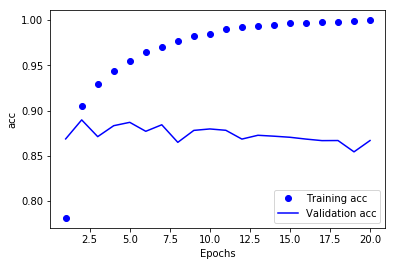

In [23]:
plt.clf()
val_acc_value = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_value, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()